In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

credit_risk_data = pd.read_csv("C:\\Users\\User\\Downloads\\credit_risk_dataset.csv")
credit_risk_data.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
basic_stats = credit_risk_data.describe()

basic_stats

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
credit_risk_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

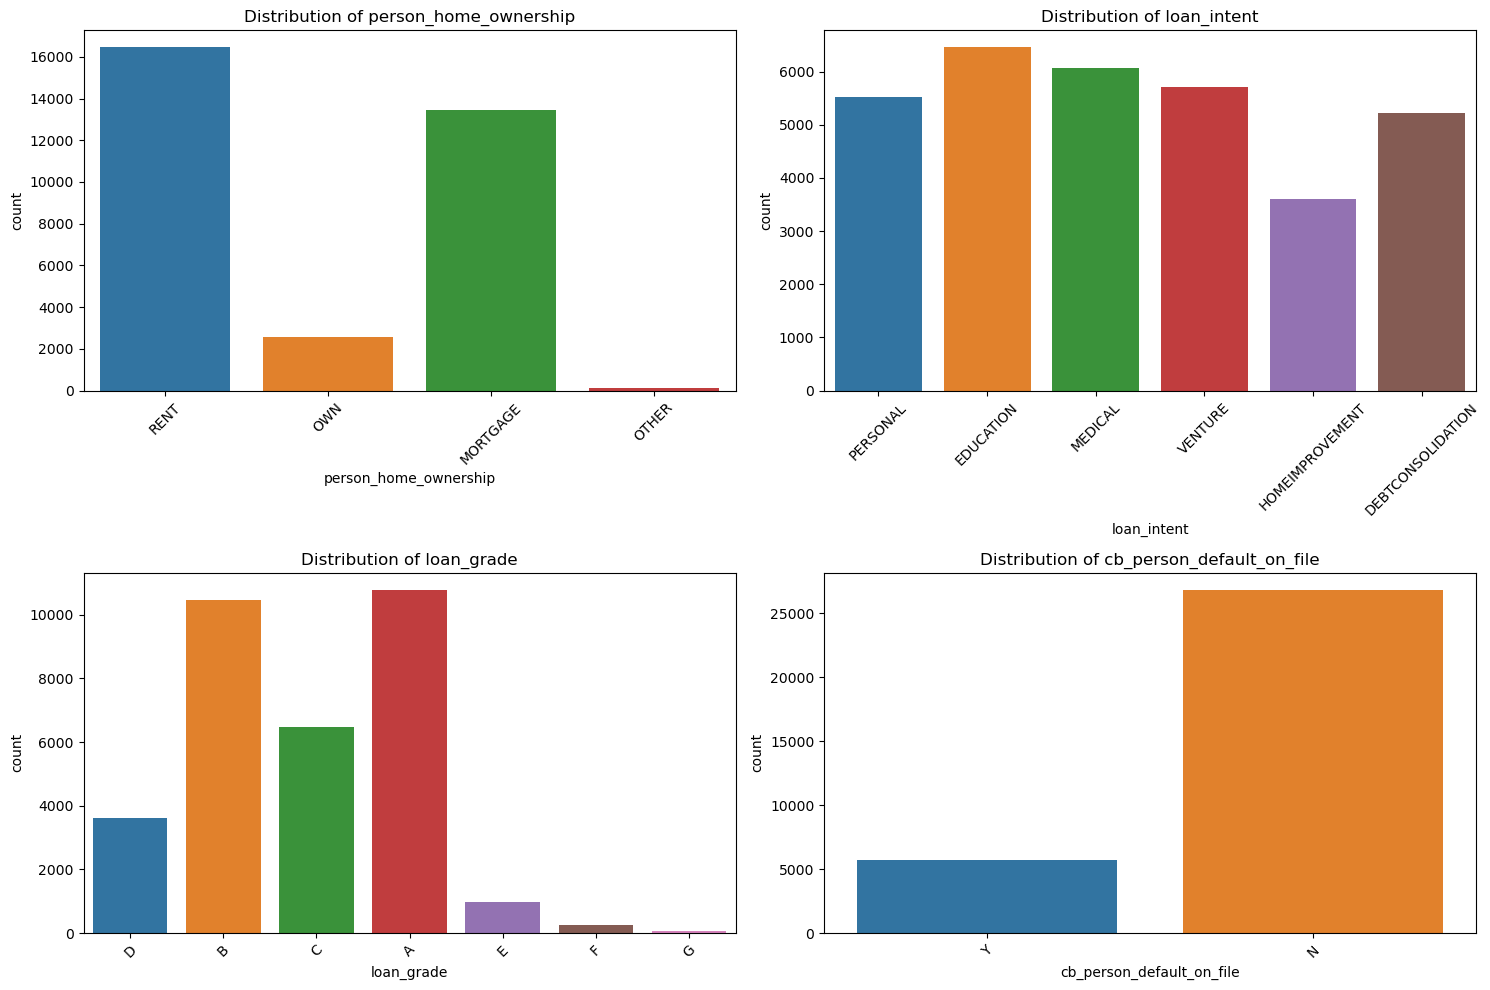

In [5]:
categorical_columns = credit_risk_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=credit_risk_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

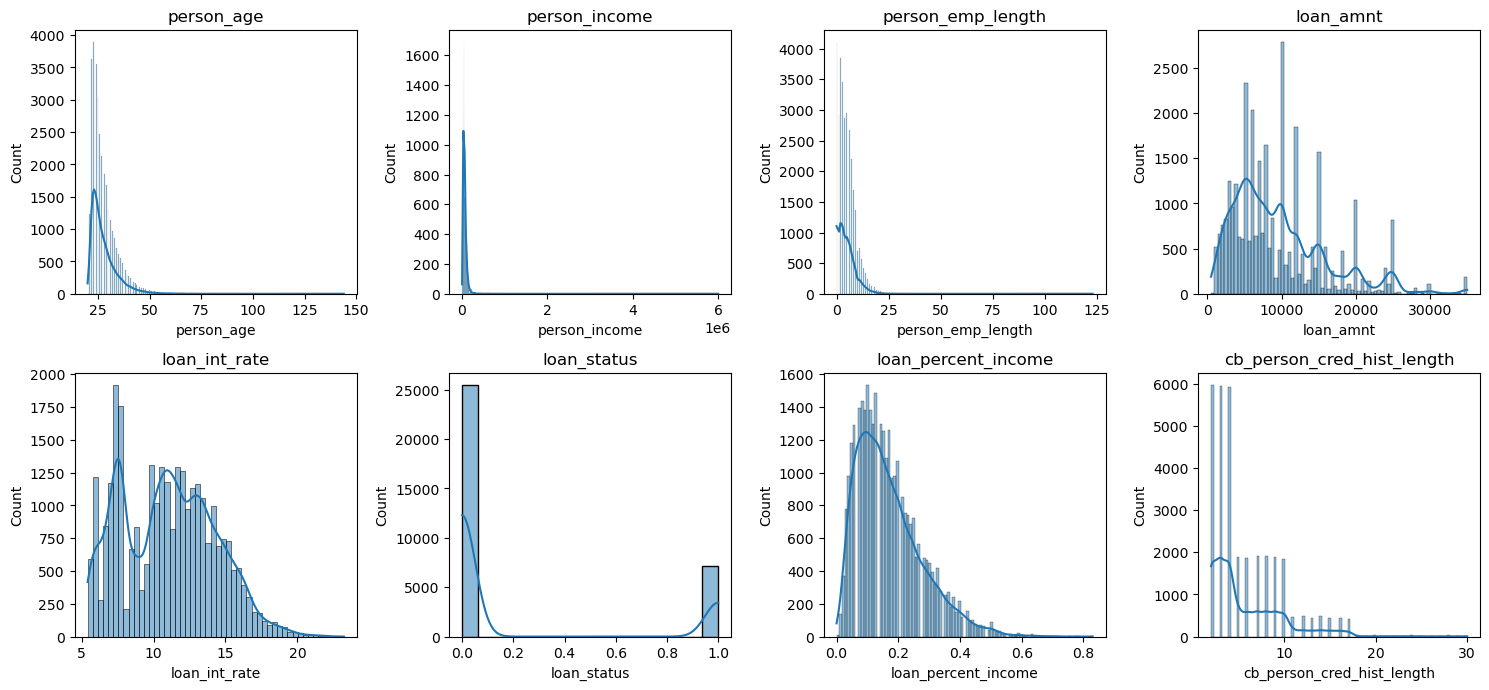

In [6]:
numeric_columns = credit_risk_data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = credit_risk_data[numeric_columns]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(numeric_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()


In [7]:
missing_values = credit_risk_data.isnull().sum()

print(missing_values)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [8]:
credit_risk_data['person_emp_length'].fillna(credit_risk_data['person_emp_length'].median(), inplace=True)
credit_risk_data['loan_int_rate'].fillna(credit_risk_data['loan_int_rate'].median(), inplace=True)

missing_values = credit_risk_data.isnull().sum()

print(missing_values)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


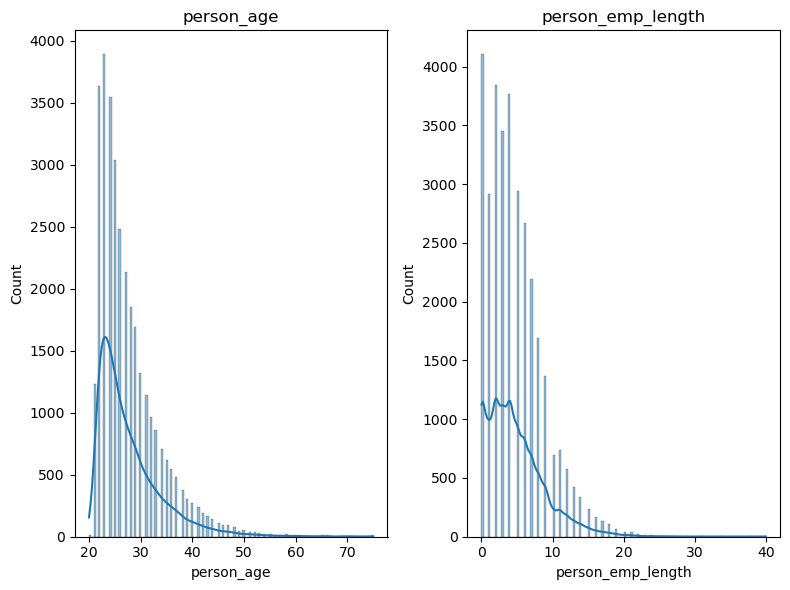

In [9]:
credit_risk_data['person_age'] = credit_risk_data['person_age'].apply(lambda x: min(x, 75))
credit_risk_data['person_emp_length'] = credit_risk_data['person_emp_length'].apply(lambda x: min(x, 40))

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(credit_risk_data['person_age'], kde=True)
plt.title('person_age')
    
plt.subplot(1, 2, 2)
sns.histplot(credit_risk_data['person_emp_length'], kde=True)
plt.title('person_emp_length')    
    
    
plt.tight_layout()
plt.show()


In [10]:
credit_risk_data = pd.get_dummies(credit_risk_data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_amnt                       32581 non-null  int64  
 4   loan_int_rate                   32581 non-null  float64
 5   loan_status                     32581 non-null  int64  
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_cred_hist_length      32581 non-null  int64  
 8   person_home_ownership_MORTGAGE  32581 non-null  uint8  
 9   person_home_ownership_OTHER     32581 non-null  uint8  
 10  person_home_ownership_OWN       32581 non-null  uint8  
 11  person_home_ownership_RENT      32581 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

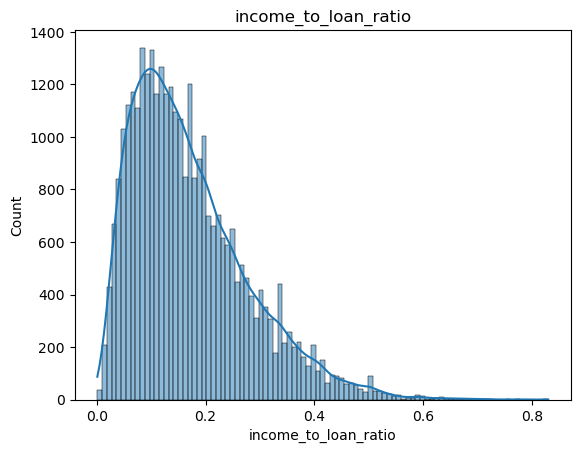

In [11]:
credit_risk_data['income_to_loan_ratio'] = credit_risk_data['loan_amnt'] / credit_risk_data['person_income']


sns.histplot(credit_risk_data['income_to_loan_ratio'], kde=True)
plt.title('income_to_loan_ratio')    
plt.show()

In [12]:
from sklearn.model_selection import train_test_split


X = credit_risk_data.drop('loan_status', axis=1)  
y = credit_risk_data['loan_status']               


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy}")

report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", report)


Model Doğruluğu: 0.8867519181585678
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7613
           1       0.73      0.77      0.75      2162

    accuracy                           0.89      9775
   macro avg       0.83      0.84      0.84      9775
weighted avg       0.89      0.89      0.89      9775



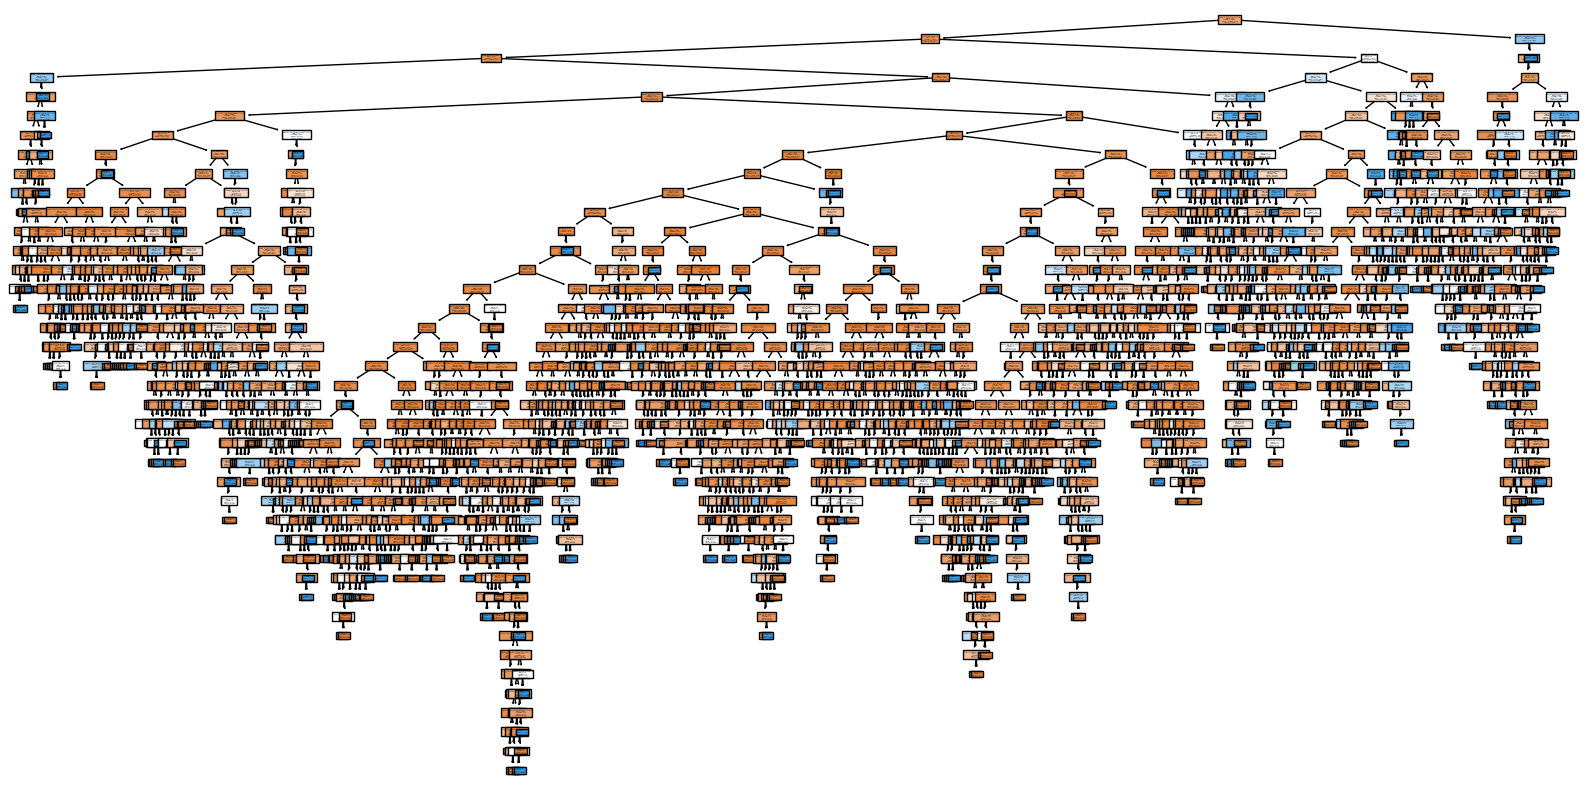

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X_train.columns, class_names=['Paid Off', 'Default'], filled=True)
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score


param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}



In [17]:
dtree_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"En İyi Parametreler: {best_params}")
print(f"Çapraz Doğrulama ile En İyi Doğruluk: {best_score}")


En İyi Parametreler: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 50}
Çapraz Doğrulama ile En İyi Doğruluk: 0.9265980150603044


In [18]:
dtree_best = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

dtree_best.fit(X_train, y_train)

y_pred_best = dtree_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Model Doğruluğu: {accuracy}")

report = classification_report(y_test, y_pred_best)
print("Sınıflandırma Raporu:\n", report)


Model Doğruluğu: 0.9281841432225064
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      7613
           1       0.96      0.71      0.81      2162

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.88      9775
weighted avg       0.93      0.93      0.92      9775



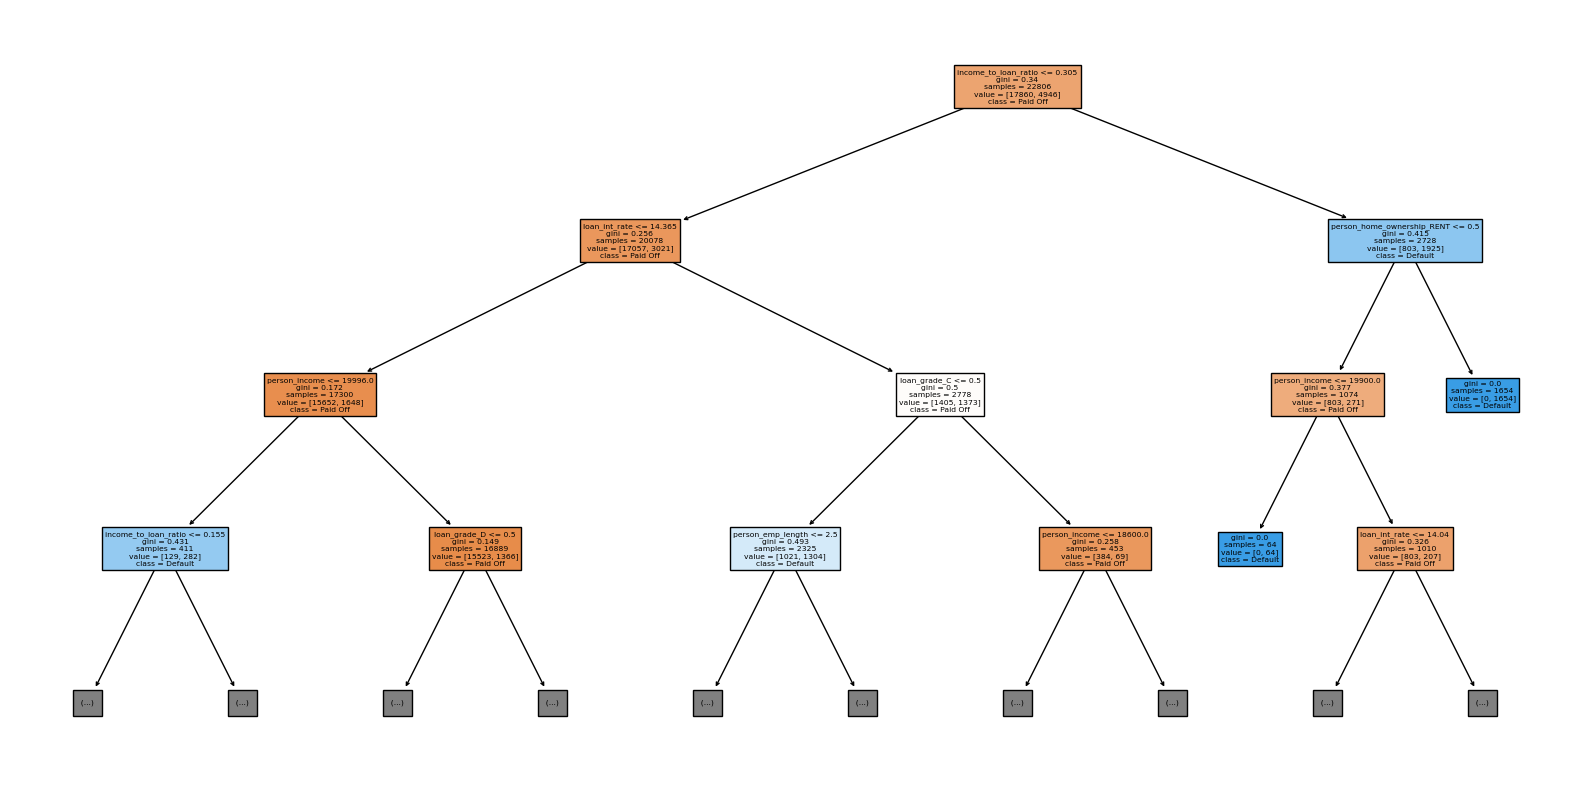

In [19]:
plt.figure(figsize=(20,10))
plot_tree(dtree_best, feature_names=X_train.columns, class_names=['Paid Off', 'Default'], filled=True, max_depth=3)
plt.show()

                           Özellik      Önem
26            income_to_loan_ratio  0.315918
10      person_home_ownership_RENT  0.188156
4                    loan_int_rate  0.162244
1                    person_income  0.099047
14             loan_intent_MEDICAL  0.047711
11   loan_intent_DEBTCONSOLIDATION  0.040312
20                    loan_grade_D  0.035148
2                person_emp_length  0.030628
19                    loan_grade_C  0.027236
13     loan_intent_HOMEIMPROVEMENT  0.012452
9        person_home_ownership_OWN  0.011004
21                    loan_grade_E  0.005509
23                    loan_grade_G  0.005330
0                       person_age  0.004236
22                    loan_grade_F  0.003149
7   person_home_ownership_MORTGAGE  0.002992
3                        loan_amnt  0.002633
16             loan_intent_VENTURE  0.001926
8      person_home_ownership_OTHER  0.001819
24     cb_person_default_on_file_N  0.001220
6       cb_person_cred_hist_length  0.000852
25     cb_

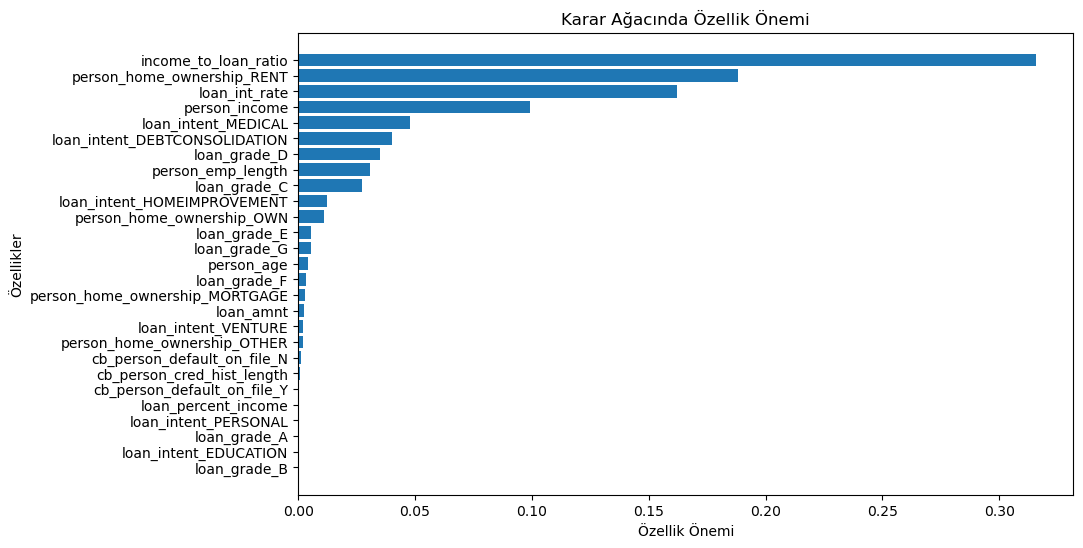

In [20]:
ozellik_onemleri = dtree_best.feature_importances_

onem_df = pd.DataFrame({
    'Özellik': X.columns,
    'Önem': ozellik_onemleri
}).sort_values(by='Önem', ascending=False)

print(onem_df)

plt.figure(figsize=(10, 6))
plt.barh(onem_df['Özellik'], onem_df['Önem'])
plt.xlabel('Özellik Önemi')
plt.ylabel('Özellikler')
plt.title('Karar Ağacında Özellik Önemi')
plt.gca().invert_yaxis()
plt.show()
